# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузка данных и предобработка - загрузите датасет так, чтобы нулевой столбец выступал в качестве индекса датафрейма. Посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - `id`, которая совершенно не информативна и будет нам только мешать, давайте сразу её уберем.
2. [1 балл] Какое среднее число лайков в датасете? А медианное?
3. [1 балл] Какой источник (автор) создал больше всего мемов? 
4. [2 балла] Создайте переменные, отвечающие за месяц, день, час и день недели, в которые мем появлялся. В какой год было создано больше всего мемов? 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [3 балла] Похоже, что наши созданные переменные не очень хорошо смотреть на одном общем графике. Давайте потсроим отдельные для каждого. Постройте гистограмму для месяца выхода мема, указав число число разбиений равное 12 (по количеству месяцев в году). В какой месяц наплодили максимальное число мемов? Почему? Теперь постройте гистограмму для часа дня, указав логичное число разбиений. Как вы можете объяснить получившийся вид графика?
7. [1 балл] Вопрос-сюрприз! Попробуйте самостоятельно придумать какой-нибудь осмысленный вопрос для вашего датасета и ответьте на  него. Инициатива не наказуема ;)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()

'/Users/dmitrys/Desktop/DataProjects/DataCulture/Homeworks/SolutionsHW2'

In [3]:
data = pd.read_csv('../datasets/Pilosan_Asat_Hillary.csv', index_col = 0)

In [3]:
data = pd.read_csv('Pilosan_Asat_Hillary.csv', index_col = 0)

In [4]:
# посмотрим на начало таблицы
data.head()

,timestamp,id,link,caption,author,network,likes
0,8/1/16 20:56,1742494,http://imgur.com/a/lNHED,"Son killed by\n country, in a\n in a\n war sta...",forwardsfromgrandma,imgur,-20
1,9/5/16 13:51,2278706,http://imgur.com/a/Cm6ls,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",politicalhumor,imgur,-17
2,7/27/16 0:54,1633557,http://imgur.com/a/FRGrq,1h\n Why end racism when we can just\n end the...,TumblrInAction,imgur,-16
3,7/8/16 4:12,1297193,http://imgur.com/a/zF2Bw,Do jokes about not noticing someone\n because ...,toosoon,imgur,-16
4,10/20/16 7:34,3017540,http://imgur.com/a/giimL,HILLARY CLINTON SAYS YOU CAN\n KILL A BABY THE...,forwardsfromgrandma,imgur,-14


In [5]:
# на конец:
data.tail()

,timestamp,id,link,caption,author,network,likes
10891,7/29/16 18:09,1678766,https://instagram.com/p/BIdHVLJBUks,bill: hey hill check this out\n hillary\n hey ...,11762801,instagram,101480
10892,4/10/16 20:17,185734,https://instagram.com/p/BECGkcSq8jQ,hillary: i hate braids\n black people: we love...,11762801,instagram,102093
10893,10/30/16 20:10,3398165,https://instagram.com/p/BMMzJFcD1vW,Katy Perry dressed as Hillary Clinton.\n She h...,1419706373,instagram,127195
10894,9/27/16 2:45,2566120,https://instagram.com/p/BK19S3KDYgU,when u laughing at hillary and donald\n debati...,1419706373,instagram,154988
10895,9/19/16 2:15,2427231,https://instagram.com/p/BKhTfWbghFL,"Hilary Clinton Says ""Let's Make It Happen""\n W...",1419706373,instagram,231028


## Datetime features

In [6]:
# переводим таймстэмпы в формат datetime, чтобы с ними было удобнее работать в дальнейшем
data['timestamp'] = data.timestamp.apply(lambda x: pd.to_datetime(x))

# создаем переменную "год", в который вышел мемчик
data['Year'] = data.timestamp.apply(lambda x: x.year)

# аналогично создайте переменные Month, Day, Hour, Weekday
data['Month'] = data.timestamp.apply(lambda x: x.month)
data['Day'] = data.timestamp.apply(lambda x: x.day)
data['Hour'] = data.timestamp.apply(lambda x: x.hour)
data['Weekday'] = data.timestamp.apply(lambda x: x.weekday)

In [7]:
# выкидываем лишнюю переменную
data = data.drop(['id'], axis=1)

In [8]:
# медианное число лайков
data.likes.median()

38.0

In [9]:
# среднее число лайков
data.likes.mean()

864.2482562408223

In [10]:
# максимальное количество лайков
data.likes.max()

231028

In [11]:
# топ авторов, создавших наибольшее количество мемчиков
data['author'].value_counts()

forwardsfromgrandma     259
6.63702E+14             243
politicalhumor          212
AdviceAnimals           165
funny                   148
7.91374E+14             139
4chan                   128
me_irl                   94
1.64687E+15              87
2.35087E+14              87
3.34749E+14              86
1.92264E+15              80
1.4538E+14               78
2.97176E+14              75
Thathappened             71
3.46787E+14              69
facepalm                 67
conservativecartoons     66
1.88355E+11              66
3.07189E+14              65
iamverysmart             61
2.46977E+14              56
2.4852E+14               55
3.52587E+14              54
3.40862E+14              54
1539151608               52
1.12884E+14              51
1.65978E+15              51
2.17926E+14              48
5.41886E+14              47
                       ... 
Punny                     1
1592489988                1
4.89096E+14               1
1.50742E+15               1
1.59157E+15         

In [12]:
# максимальное число мемов, созданных одним троллем
data.author.value_counts().max()

259

In [13]:
# число мемов, созданных за определенный год
data.Year.value_counts()

2016    10717
2015      169
2014        8
2013        2
Name: Year, dtype: int64

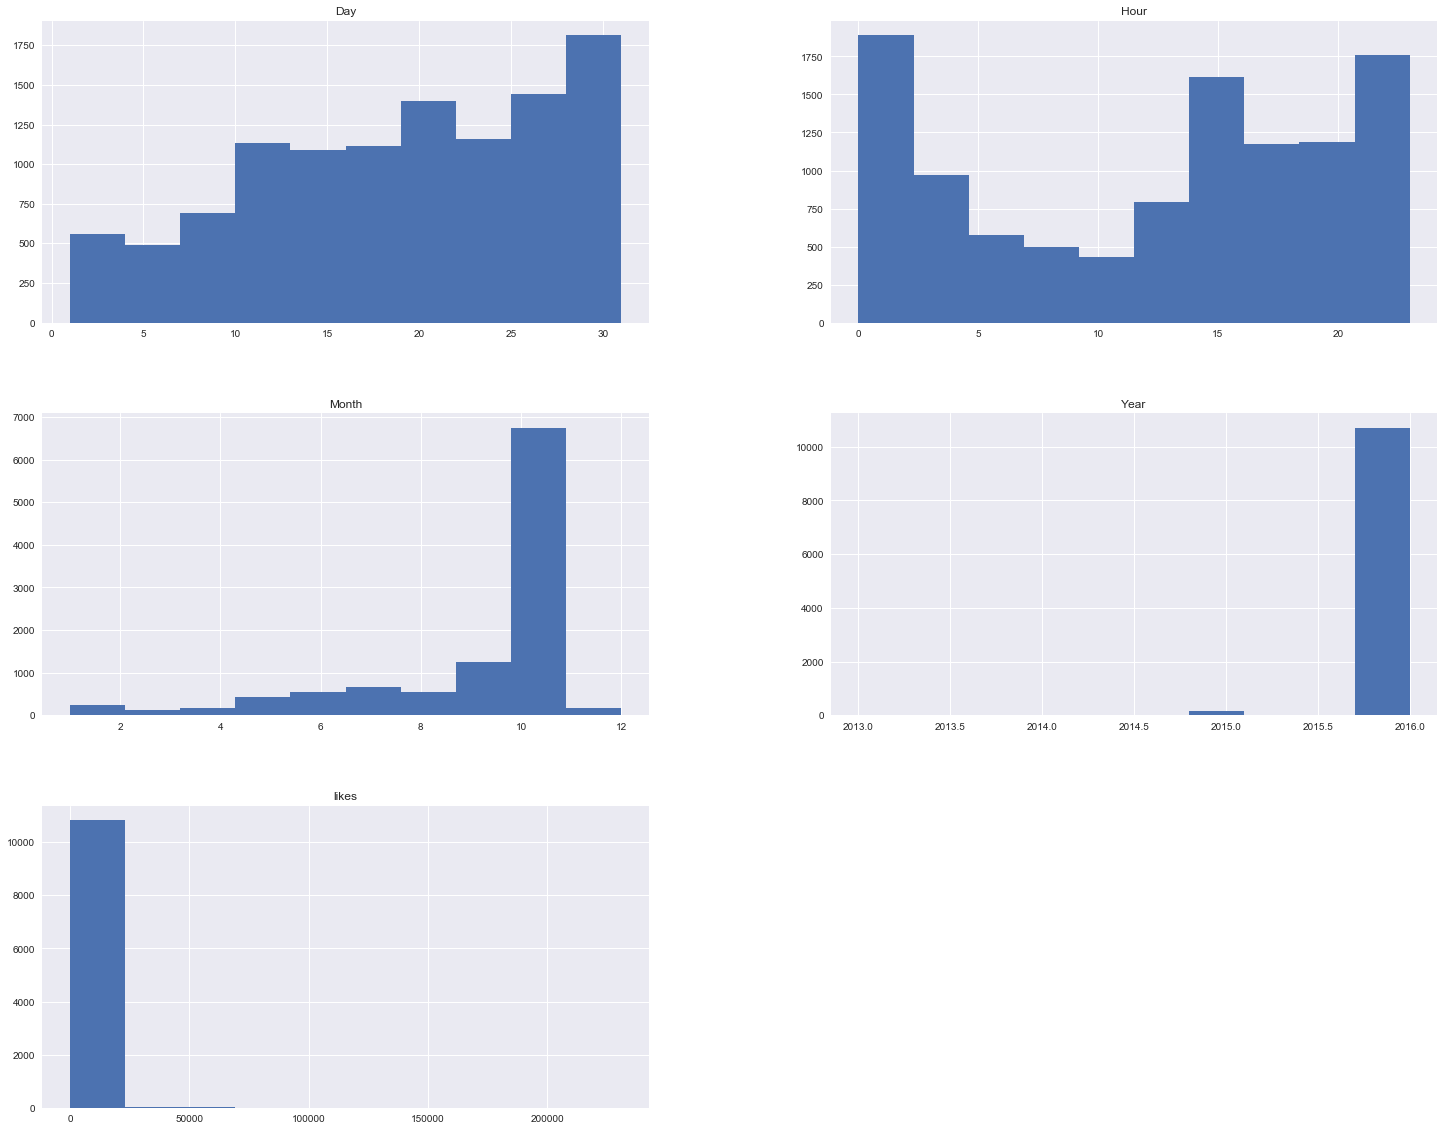

In [14]:
# гистограммы, показывающие в какой час, день, месяц и год было созданно определенное количество мемов
data.hist(figsize=(25, 20));

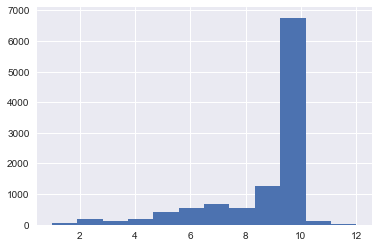

In [15]:
# гистограмма показывает, что, чем ближе президентские выборы, тем больше мемчиков гуляет по сети
data['Month'].hist(bins=12)

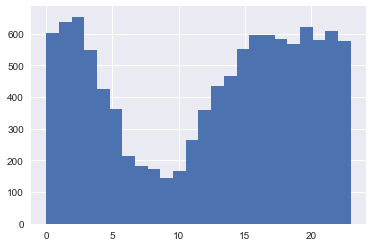

In [16]:
# а тут мы видим, что мемы просматриваются в основном с 2 часов дня до 2 часов ночи
data['Hour'].hist(bins=24)

In [17]:
#на какой платформе набралось больше всего лайков и сколько 

a = data.groupby('network').likes.sum().facebook
b = data.groupby('network').likes.sum().imgur
c = data.groupby('network').likes.sum().twitter
d = data.groupby('network').likes.sum().instagram

if a>d & a>b & a>c  :
    print ('В Instagram набралось больше всего лайков, а именно  ', data.groupby('network').likes.sum().max())
elif b>c & b>a & b>d:
    print ('В Imgur набралось больше всего лайков, а именно  ', data.groupby('network').likes.sum().max())
elif c>a & c>b & c>d:
    print ('В Twitter набралось больше всего лайков, а именно  ', data.groupby('network').likes.sum().max())
elif d>a & d>c & d>b:
    print ('В Facebook набралось больше всего лайков, а именно  ', data.groupby('network').likes.sum().max())

В Facebook набралось больше всего лайков, а именно   4867389


In [18]:
# тут мы смотрим где у нас пропуски на всякий случай
data.isnull().sum()

timestamp     0
link          0
caption       0
author       88
network       0
likes         0
Year          0
Month         0
Day           0
Hour          0
Weekday       0
dtype: int64

In [19]:
# тут мы смотрим на начало датасета на всякий случай
data.head()

,timestamp,link,caption,author,network,likes,Year,Month,Day,Hour,Weekday
0,2016-08-01 20:56:00,http://imgur.com/a/lNHED,"Son killed by\n country, in a\n in a\n war sta...",forwardsfromgrandma,imgur,-20,2016,8,1,20,<built-in method weekday of Timestamp object a...
1,2016-09-05 13:51:00,http://imgur.com/a/Cm6ls,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",politicalhumor,imgur,-17,2016,9,5,13,<built-in method weekday of Timestamp object a...
2,2016-07-27 00:54:00,http://imgur.com/a/FRGrq,1h\n Why end racism when we can just\n end the...,TumblrInAction,imgur,-16,2016,7,27,0,<built-in method weekday of Timestamp object a...
3,2016-07-08 04:12:00,http://imgur.com/a/zF2Bw,Do jokes about not noticing someone\n because ...,toosoon,imgur,-16,2016,7,8,4,<built-in method weekday of Timestamp object a...
4,2016-10-20 07:34:00,http://imgur.com/a/giimL,HILLARY CLINTON SAYS YOU CAN\n KILL A BABY THE...,forwardsfromgrandma,imgur,-14,2016,10,20,7,<built-in method weekday of Timestamp object a...


In [20]:
# тут мы выкидываем не нужные данные
data = data.drop(['link'], axis=1)
data = data.drop(['timestamp'], axis=1)
data = data.drop(['author'], axis=1)
data = data.drop(['network'], axis=1)
data = data.drop(['Year'], axis=1)

In [21]:
data = data.drop(['Month'], axis=1)
data = data.drop(['Day'], axis=1)
data = data.drop(['Hour'], axis=1)
data = data.drop(['Weekday'], axis=1)

In [22]:
# еще раз взглянем
data.head()

,caption,likes
0,"Son killed by\n country, in a\n in a\n war sta...",-20
1,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",-17
2,1h\n Why end racism when we can just\n end the...,-16
3,Do jokes about not noticing someone\n because ...,-16
4,HILLARY CLINTON SAYS YOU CAN\n KILL A BABY THE...,-14


In [23]:
# переводим в нижний регистр
data['caption'] = data['caption'].str.lower()

In [24]:
# импортируем нужный нам метод
from sklearn.feature_extraction.text import TfidfVectorizer

### Комментарий
Я тут добавил еще стоп-слова, чтобы  питон выкинул всякий мусор из текста, который не несет информации, то есть артикли, союзы, предлоги и вот это вот всё. Их очень много, но они только мешают и раздувают наше и без того большое признаковое пространство

In [25]:
# объявляем его
tf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.001, stop_words='english', norm='l2')

In [26]:
# выбираем для нашей матрицы признаков ТОЛЬКО столбец с текстом
X = data['caption']

In [27]:
# импортим пакет для работы с матрицами, дальше может пригодиться
import numpy as np

In [28]:
import matplotlib.pyplot as plt   # уже смутно знакомый вам пакет для картинок :3
import seaborn as sns             # ещё один пакет для картинок 

%matplotlib inline

In [29]:
# так как мы хотим прологарифмировать лойсы, нам надо сделать так, чтобы среди них не было отрицательных чисел и равных нулю
data.dropna(subset=['likes'], inplace = True)
data['likes'] = np.log(data['likes'] + np.abs(data['likes'].min()) +1)

### Комментарий
Замечательно, что прологарифмировал, плохо, что игрек после этого не перезаписал - там по-прежнему были значения  без логарифма

In [30]:
# заодно выбираем целевую переменную
y = data['likes']

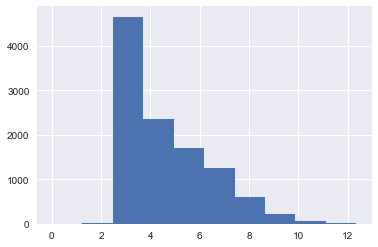

In [31]:
# построим лайковую гистограмму
data.likes.hist()

In [32]:
# прогоняем через преобразование и получаем готовую матрицу признаков
X = tf_vectorizer.fit_transform(X)

In [33]:
# Теперь делим данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [35]:
print(X_train.shape) # Посмотрим на размеры трэйна и теста 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7627, 6266)
(3269, 6266)
(7627,)
(3269,)


In [35]:
# импортим случайный лес и объявляем его
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf = RandomForestRegressor()

In [53]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

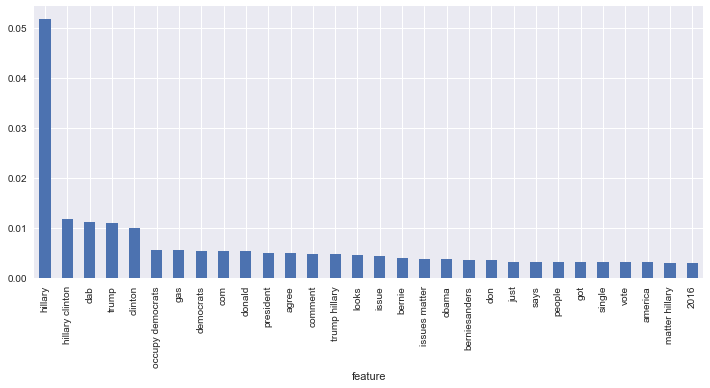

In [54]:
# Пытаемся  посмотреть на важность слов
featureImportance = pd.DataFrame({"feature": tf_vectorizer.get_feature_names(), 
                                  "importance": rf.feature_importances_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))

### Комментарий
А метрики регрессионные посмотреть? ;) 

In [36]:
from sklearn import metrics

def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))

Запилим константный прогноз и посмотрим его качество

In [62]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им лойсы
y_pred_naive[:5]

array([4.61970753, 4.61970753, 4.61970753, 4.61970753, 4.61970753])

In [76]:
print_metrics(y_test, y_pred_naive)

MAE: 1.421957897424021
RMSE: 1.7311140177021003
R2: -0.0018933129436271567


А теперь спрогнозируем моделькой

In [56]:
y_pred = rf.predict(X_test)

In [77]:
print_metrics(y_test, y_pred)

MAE: 1.3365653087316458
RMSE: 1.758779234611434
R2: -0.034172036653650206


Похоже, моделька прогнозирует даже хуже, чем просто константа, возможно, если мы её попробуем настроить, качество будет получше :)

In [64]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке
y_pred_regr = model_regression.predict(X_test)

In [78]:
print_metrics(y_test, y_pred_regr)

MAE: 23.527745696949303
RMSE: 52.26613671234392
R2: -912.2946886675272


С линейной регрессией совсем тяжко :(

А вот если попробовать немного другую регрессию, метрики, наконец, поднимаются над наивным прогнозом

In [37]:
from sklearn.linear_model import Ridge

# Объявили модель
model_regression = Ridge()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке
y_pred_regr = model_regression.predict(X_test)

print_metrics(y_test, y_pred_regr)

MAE: 1.324665326012003
RMSE: 1.6591041645730271
R2: 0.07791333127716393


### Комментарий 
Сорян, нашел ошибку  - не надо было писать `.coef_[0]`, без нуля всё работает, как надо, так что я тут чуть-чуть поигрался с визуализацией, чтобы было красиво

In [59]:
# Пытаемся посмотреть на топ-слова, влияющие на увеличение и снижение числа лайков, upd: не вышло:(
featureImportance = pd.DataFrame({"feature": tf_vectorizer.get_feature_names(), 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)

In [71]:
def plotImportance(featureImportance, top_words=20):
    """
        Plot importance of words in linear model
        
        featureImportance: pd.DataFrame
            data with coefs values
        
        top_words: int
            how many words to plot on both negative and positive sides
    """
    featureImportance = featureImportance.head(top_words).append(featureImportance.tail(top_words))
    x = np.arange(len(featureImportance))
    y = featureImportance.importance

    mask1 = y < 0
    mask2 = y >= 0

    plt.figure(figsize=(18, 8))
    plt.bar(x[mask1], y[mask1], color = 'red')
    plt.bar(x[mask2], y[mask2], color = 'blue')
    plt.xticks(np.arange(len(featureImportance)), 
                   featureImportance.index, rotation=90, ha="right", fontsize=11)
    plt.show()

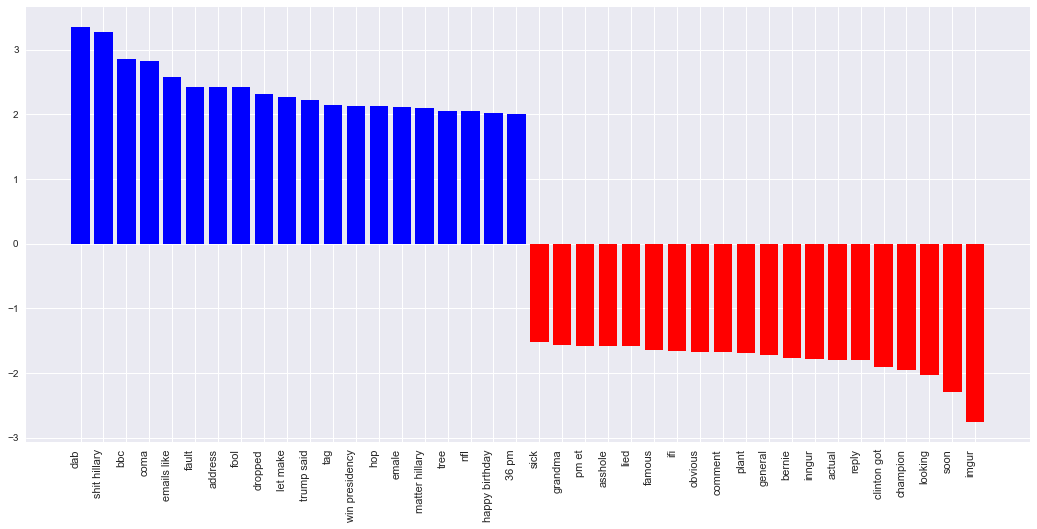

In [72]:
plotImportance(featureImportance)

А вот и топ признаков, влияющих на число лойсов, те, что слева - ведут к росту луизитаний, видно, что много раз встречается Хиллари, всякие тэги новостных агенств и т.д., а те, что справа - ведут в снижению, тут есть grandma, imguir и кандидат-конкурент bernie, так что, достаточно неплохо и информативно получилось :)

### Резюмируя
Предобработка данных - почти удалась, только вот логарифмировать надо до того, как разбиваешь данные на train-test

Модельки - действительно построил, с этим всё ок

Метрики - как-то упустил из виду

Визуализация результатов - для леса всё супер получилось, для линейной модели - все-таки это был косяк :) 